In [1]:
import corrlab
reload(corrlab)
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import linear_regression_for_NI as ni
reload(ni)

<module 'linear_regression_for_NI' from 'linear_regression_for_NI.pyc'>

In [3]:
train_start, train_end = '20171113', '20171113'
test_start, test_end = '20171114', '20171114'
period, lag, target = '1s', '1s', 'ru0'
type = 0

In [4]:
rs = ni.simu(train_start, train_end,test_start, test_end, period, lag, target, type = type)

In [5]:
train, test = rs.get_train_test()

/home/hui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/hui/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
train_volu = rs.corr.getvolu(['20171113'])
test_volu = rs.corr.getvolu(['20171114'])

In [230]:
lag_ = '5s'
period_ = '5s'

In [231]:
shifted_test_volu,shifted_train_volu = rs.shift(test_volu, train_volu,lag = lag_)
sampled_test_volu,sampled_train_volu = rs.sample(shifted_test_volu, shifted_train_volu,period = period_)


In [7]:
sampled_train, sampled_test = rs.sample(train, test,period= period)
shifted_train, shifted_test = rs.shift(train, test,lag = lag)


In [19]:
_,only_sampled = rs.sample(train, test, period=period_)

In [9]:
sampled_train.corr()['ru0']['SF0']

0.016172093704363805

In [242]:
shifted = sampled_test[target].shift(-5,'s')

In [244]:
shifted

2017-11-14 08:59:55   -0.000351
2017-11-14 09:00:00    0.000000
2017-11-14 09:00:05   -0.002456
2017-11-14 09:00:10   -0.000526
2017-11-14 09:00:15    0.000000
2017-11-14 09:00:20    0.000000
2017-11-14 09:00:25    0.000000
2017-11-14 09:00:30    0.000000
2017-11-14 09:00:35    0.000000
2017-11-14 09:00:40   -0.000351
2017-11-14 09:00:45    0.000176
2017-11-14 09:00:50    0.000000
2017-11-14 09:00:55   -0.000351
2017-11-14 09:01:00    0.000000
2017-11-14 09:01:05    0.000000
2017-11-14 09:01:10    0.000000
2017-11-14 09:01:15    0.000000
2017-11-14 09:01:20    0.000176
2017-11-14 09:01:25    0.000352
2017-11-14 09:01:30    0.000352
2017-11-14 09:01:35   -0.000352
2017-11-14 09:01:40    0.000352
2017-11-14 09:01:45    0.000000
2017-11-14 09:01:50   -0.000352
2017-11-14 09:01:55    0.000000
2017-11-14 09:02:00    0.000000
2017-11-14 09:02:05   -0.001058
2017-11-14 09:02:10    0.001951
2017-11-14 09:02:15   -0.000177
2017-11-14 09:02:20   -0.000177
                         ...   
2017-11-

In [164]:
use_col = sampled_test.corr()[abs(sampled_test.corr()['ru0'])>0.2].index.values
use_col = list(use_col)
use_col.remove(target)

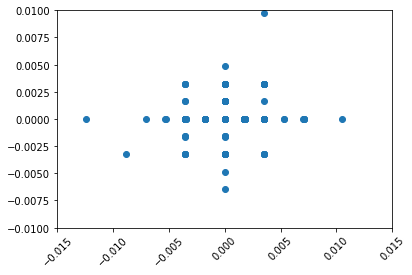

In [203]:
# sampled_train[target].plot()
plt.scatter(sampled_test[target]*10,sampled_test['al0']*10)
plt.xticks(rotation = 45)
plt.xlim(-0.015,0.015)
plt.ylim(-0.01,0.01)
plt.show()

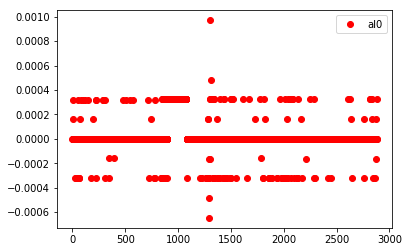

In [213]:
plt.plot(sampled_test[target].values[:200],label = target)
plt.plot(sampled_test['al0'].values[:200], label = 'al0')
plt.legend()
plt.show()

(2882, 39)

In [129]:
train_x = pd.concat([sampled_train[use_col],sampled_train_volu[use_col]],axis=1)
train_y = sampled_train[target]

In [177]:
train_x = (train_x - train_x.mean())/(train_x.std())
# train_y = (train_y - train_y.mean())/(train_y.std())

In [189]:
# test_x = pd.concat([sampled_test[use_col],sampled_test_volu[use_col]],axis=1)
test_x = sampled_test[use_col]
test_y = sampled_test[target]

In [185]:
test_x = (test_x - test_x.mean())/(test_x.std())
# train_y = (train_y - train_y.mean())/(train_y.std())

In [218]:
dic = rs.countNozero(sampled_test)
filt = rs.filternum(sampled_test, threshold=0.1)

In [220]:
set(filt) & set(use_col)

{'SF0'}

In [192]:
from sklearn.linear_model import  RidgeCV, Ridge
clf = RidgeCV(alphas=np.arange(0,50,0.1) ,normalize=False)
clf.fit(test_x, test_y)
print 'alpha:', clf.alpha_
clf = Ridge(alpha=clf.alpha_,normalize=True, max_iter=1000)
clf.fit(test_x, test_y)
# print 'coef:', clf.coef_
print 'train score:',clf.score(test_x, test_y)

alpha: 0.0
train score: 0.268789619267


In [193]:
print clf.coef_

[ 0.33079956 -0.23413714  0.29775822  0.21537526 -0.0754807 ]


In [188]:
test_x

,al0,c10,a10,OI0,SF0,al0,c10,a10,OI0,SF0
2017-11-14 09:00:00,-0.178481,0.165485,-0.158089,-0.145114,0.128770,-1.390188,-1.233385,2.674848,-1.011386,-0.555966
2017-11-14 09:00:05,1.311563,0.165485,-0.158089,-0.145114,-14.510381,-1.256237,-1.309730,-1.288868,-1.366595,0.358080
2017-11-14 09:00:10,-0.178481,11.260935,4.784574,-0.145114,1.104713,-1.300888,0.726853,-0.680484,1.723727,-0.698786
2017-11-14 09:00:15,-0.178481,0.165485,-0.158089,-0.145114,0.128770,-1.412513,-1.135534,-0.698920,1.261955,-0.641658
2017-11-14 09:00:20,2.801606,0.165485,-0.158089,-0.145114,-0.847174,-1.122286,-0.934457,-0.901715,0.409452,-0.698786
2017-11-14 09:00:25,-0.178481,0.165485,-5.100753,-0.145114,0.128770,-1.122286,-0.984995,-1.104509,-0.549613,-0.527402
2017-11-14 09:00:30,-0.178481,0.165485,-0.158089,-0.145114,0.128770,-1.211587,-0.515097,-0.791099,-1.046907,-0.698786
2017-11-14 09:00:35,-0.178481,0.165485,-0.158089,-0.145114,0.128770,-1.189262,-0.958113,-0.403946,-0.833781,-0.555966
2017-11-14 09:00:40,-0.178481,0.165485,-0.158089,-0.145114,-1.826303,-1.144611,-0.629077,-1.288868,-0.762739,-0.527402
2017-11-14 09:00:45,-0.178481,0.165485,-2.628747,-2.232380,0.128770,-1.144611,-0.452731,-0.403946,-1.331074,0.072441


In [119]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train_x, train_y)
clf.score(train_x, train_y)

0.024689437940219272

In [194]:
test_pred = clf.predict(test_x)
print 'accuarcy of positive or negative:', rs.accu(rs.calssConvert(test_pred), rs.calssConvert(sampled_test[target]))

accuarcy of positive or negative: 0.267869535045


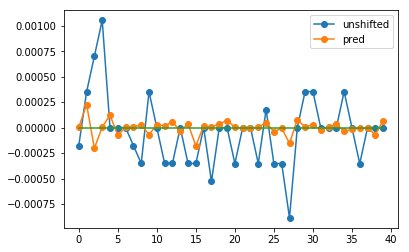

In [195]:
rs.contrast(test_pred, only_sampled[target].values,start=0,end=40)

In [380]:
ni.accu(ni.calssConvert(train_pred), ni.calssConvert(train['ru0']))

0.41478140180430256

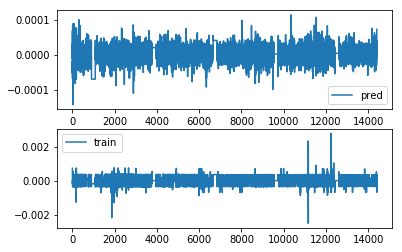

mean value of pred is -0.0000 and true mean is -0.0000
std value of pred is 0.0000 and true std is 0.0002


In [376]:
clf.score(train[train_symbol], train['ru0'])
train_pred = clf.predict(train[train_symbol])
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(range(len(train_pred)),train_pred,label = 'pred')
ax1.legend()
ax2.plot(range(len(train['ru0'])),train['ru0'],label = 'train')

plt.legend()
plt.show()
print 'mean value of pred is %.4f and true mean is %.4f' %(np.mean(day1127_pred), np.mean(day1127['ru0']))
print 'std value of pred is %.4f and true std is %.4f' %(np.std(day1127_pred), np.std(day1127['ru0']))

In [98]:
test.corr()['ru0'].sort_values(ascending = False)

ru0    1.000000
FG0    0.098898
v10    0.080545
c10    0.046743
p10    0.046490
l10    0.044957
SM0    0.026673
m10    0.023132
rb0    0.019411
bu0    0.018951
ni0    0.018034
jd0    0.011753
jm0    0.010505
T10    0.010290
RM0    0.009523
j10    0.009492
IC0    0.009113
y10    0.007373
OI0    0.007336
TF0    0.007056
CF0    0.006346
cs0    0.005763
al0    0.003171
IH0    0.002672
TA0    0.002403
hc0    0.000644
ZC0   -0.001413
zn0   -0.004633
sn0   -0.005470
pb0   -0.005736
MA0   -0.007681
pp0   -0.014815
ag0   -0.015684
au0   -0.017480
cu0   -0.019895
IF0   -0.021058
i10   -0.029576
a10   -0.045031
SF0         NaN
Name: ru0, dtype: float64

In [214]:
day1127 = train.iloc[:2800]

In [343]:
usecol = day1127.corr()['ru0'][(day1127.corr()['ru0']<1) & (day1127.corr()['ru0']>0.02)].sort_values(ascending = False).index.values[:4]


In [266]:
def standardize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)
train_x = standardize(day1127[usecol])
train_y = (day1127['ru0'] - np.mean(day1127['ru0']))

In [355]:
clf = RidgeCV(alphas=np.arange(0.025,5,0.025),normalize=True,cv=10)
clf.fit(day1127[usecol], day1127['ru0'])
day1127_pred = clf.predict(day1127[usecol])
# normalized_y = (day1127['ru0']

0.025


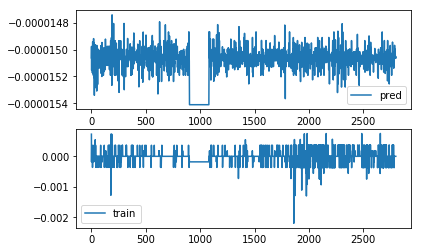

mean value of pred is -0.0000 and true mean is -0.0000
std value of pred is 0.0000 and true std is 0.0002


In [356]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(range(len(day1127_pred)),day1127_pred,label = 'pred')
ax1.legend()
ax2.plot(range(len(day1127['ru0'])),day1127['ru0'],label = 'train')

plt.legend()
plt.show()
print 'mean value of pred is %.4f and true mean is %.4f' %(np.mean(day1127_pred), np.mean(day1127['ru0']))
print 'std value of pred is %.4f and true std is %.4f' %(np.std(day1127_pred), np.std(day1127['ru0']))

In [357]:
train_class = ni.calssConvert(day1127['ru0'])
pred_class = ni.calssConvert(day1127_pred)
print ni.accu(train_class, pred_class)

0.915714285714


In [311]:
accuarcy = {}
for alpha in np.arange(0.25,10,0.25):
    clf = Ridge(alpha=alpha,normalize=True)
    clf.fit(day1127[usecol], day1127['ru0'])
    day1127_pred = clf.predict(day1127[usecol])
    train_class = ni.calssConvert(day1127['ru0'])
    pred_class = ni.calssConvert(day1127_pred)
    test_pred = clf.predict(test[usecol])
    test_class = ni.calssConvert(test['ru0'])
    test_pred_class = ni.calssConvert(test_pred)
    accuarcy[alpha] = ni.accu(test_class, test_pred_class)

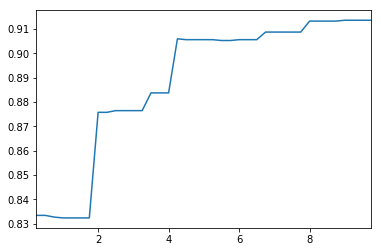

In [312]:
pd.Series(accuarcy).plot()
plt.show()

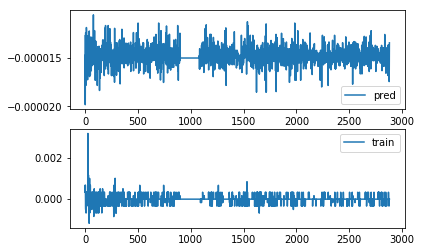

mean value of pred is -0.0000 and true mean is -0.0000
std value of pred is 0.0000 and true std is 0.0002


In [224]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(range(len(test_pred)),test_pred,label = 'pred')
ax1.legend()
ax2.plot(range(len(test['ru0'])),test['ru0'],label = 'train')
plt.legend()
plt.show()
print 'mean value of pred is %.4f and true mean is %.4f' %(np.mean(day1127_pred), np.mean(day1127['ru0']))
print 'std value of pred is %.4f and true std is %.4f' %(np.std(day1127_pred), np.std(day1127['ru0']))

In [315]:
origin = corr.concatdata(['20171127'])

In [318]:
origin = corr.sampledata(origin,'5s')

0.0

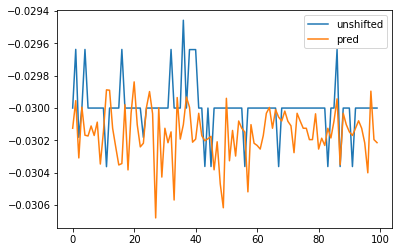

In [366]:
start, end = 0,100
ni.contrast(day1127_pred, origin['ru0']-0.03,start,end,coef=2000)

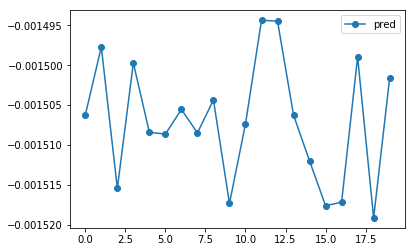

In [447]:
plt.plot( day1127_pred[:20]*100,'-o',label = 'pred')
plt.legend()
plt.show()